31/1/2026

Main Workflow for the Computational Functional Genomics Project

Intermediate Goal : Build a Markov-based classifier to classify whether a specified region in the chromosome will bind to a TF or not. 

Steps/Things to do:
1. Function to load .tsv files and convert into dataframe
2. Function to read FASTA files 

In [1]:
import helper_funcs as hf
import importlib
importlib.reload(hf)


<module 'helper_funcs' from '/home/govind/personal/CFG_Classifier_Project/helper_funcs.py'>

Test 1

In [2]:
sample_df = hf.load_tsv_file('projectData/chr1_200bp_bins.tsv')

In [3]:
unbound_df = hf.stripped_df(df=sample_df,
                            tf_id='REST',
                            bclass='U',
                            )

bound_df = hf.stripped_df(df=sample_df,
                            tf_id='REST',
                            bclass='B',
                            )

target_df = hf.stripped_df(df=sample_df,
                            tf_id='REST',
                            bclass=None,
                            )

In [49]:
b_matrix = hf.construct_transition_matrix(markov_order=5,
                                  fasta_file_path='projectData/chr1.fa',
                                  target_df=bound_df,
                                  chr_id='chr1',
                                  tf_id='REST')

u_matrix = hf.construct_transition_matrix(markov_order=5,
                                  fasta_file_path='projectData/chr1.fa',
                                  target_df=unbound_df,
                                  chr_id='chr1',
                                  tf_id='REST')

Constructing Transition Matrices: 100%|██████████| 341246/341246 [07:07<00:00, 798.61it/s]


In [37]:
test_scores = hf.binding_prob_database(markov_order=5,
                                       tf_data = target_df,
                                       fasta_file_path = 'projectData/chr1.fa',
                                       chr_id = 'chr1',
                                       bmatrix = b_matrix,
                                       umatrix = u_matrix)



Calculating Scores: 100%|██████████| 347179/347179 [01:18<00:00, 4411.43it/s]


In [38]:
print(test_scores)

         chr      start        end REST   Score_5
0       chr1      11800      12000    U  0.348836
1       chr1      12000      12200    U  1.004917
2       chr1      12200      12400    U  1.543216
3       chr1      12400      12600    U -1.318507
4       chr1      12600      12800    U  4.582950
...      ...        ...        ...  ...       ...
347174  chr1  248931200  248931400    U  0.422907
347175  chr1  248931400  248931600    U -0.228353
347176  chr1  248931600  248931800    U -1.952683
347177  chr1  248936600  248936800    U -0.061679
347178  chr1  248936800  248937000    U -0.166326

[347179 rows x 5 columns]


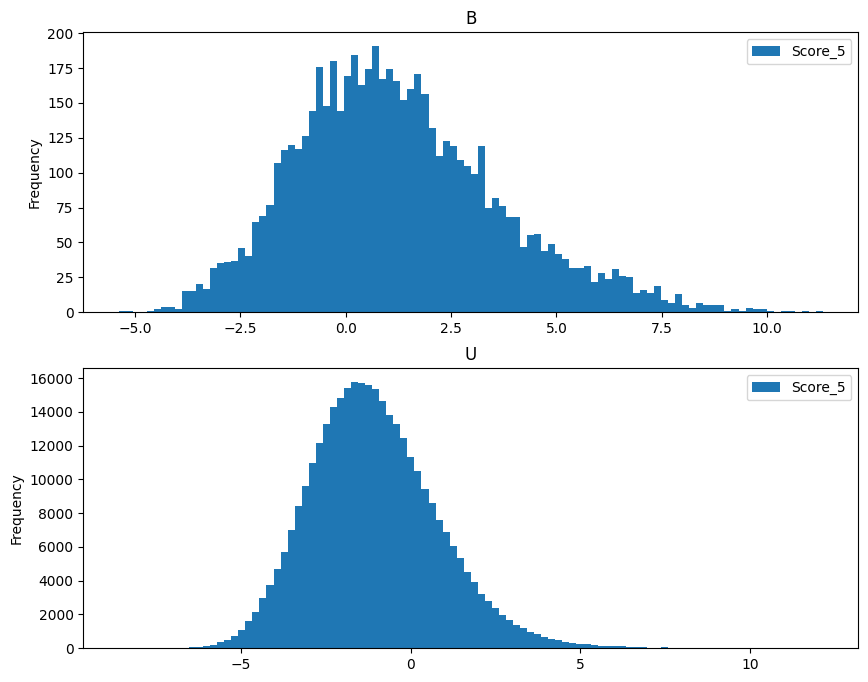

In [41]:
import matplotlib.pyplot as plt

ax = test_scores.plot.hist(column=["Score_5"], by='REST',figsize=(10, 8),bins=100)

0.07555174733055853


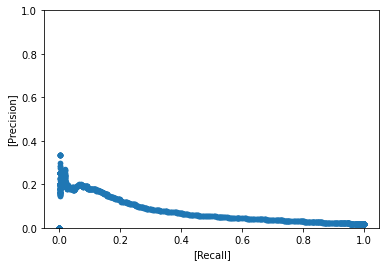

In [8]:
import pandas as pd
import importlib

import testing_funcs
importlib.reload(testing_funcs)

test2 = pd.read_csv('resultData/m7k4f4.csv')
ax = test2.plot(kind='scatter',x=['Recall'],y=['Precision'],ylim=(0,1))

print(testing_funcs.AU_PRC(test2))


In [7]:
test2_df = hf.load_tsv_file('projectData/chr1_200bp_bins.tsv')
num_bound = len(test2_df[test2_df['REST']=='B'])
total = len(test2_df)
baseline = num_bound/total
print(baseline)

0.017089167259540468
